<div class="alert alert-block alert-danger">

# FIT5196 Task 2 in Assessment 1
    
#### Student Name: Pragy Parashar
#### Student ID: 31940757

Date: 10/04/2023

Environment: Google Colab

Libraries used:
* os (for interacting with the operating system, included in Python xxxx) 
* pandas 1.1.0 (for dataframe, installed and imported) 
* multiprocessing (for performing processes on multi cores, included in Python 3.6.9 package) 
* itertools (for performing operations on iterables)
* nltk 3.5 (Natural Language Toolkit, installed and imported)
* nltk.collocations (for finding bigrams, installed and imported)
* nltk.tokenize (for tokenization, installed and imported)
* nltk.stem (for stemming the tokens, installed and imported)

    </div>

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Input File](#examine) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Tokenization](#tokenize) <br>
$\;\;\;\;$[4.2. Sparse Feature Generation ](#whetev) <br>
$\;\;\;\;$[4.3. Finding First 200 Bigrams](#bigrams) <br>
[5. Writing Output Files](#write) <br>
$\;\;\;\;$[5.1. Vocabulary List](#write-vocab) <br>
$\;\;\;\;$[5.2. Sparse Matrix](#write-sparseMat) <br>
$\;\;\;\;$[5.3. Statistics Matrix](#write-sparseMat) <br>
[6. References](#Ref) <br>

<div class="alert alert-block alert-success">
    
## 1.  Introduction  <a class="anchor" name="Intro"></a>

This assessment concerns textual data and the aim is to extract data, process them, and transform them into a proper format. The dataset provided is in the format of a PDF file containing ....

<div class="alert alert-block alert-success">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>

In this assessment, any python packages is permitted to be used. The following packages were used to accomplish the related tasks:

* **os:** to interact with the operating system, e.g. navigate through folders to read files
* **re:** to define and use regular expressions
* **pandas:** to work with dataframes
* **multiprocessing:** to perform processes on multi cores for fast performance
*   **urllib** : to browse the url and download the required files
*   **collections** to import container datatypes



<div class="alert alert-block alert-warning">
    
### 2.1. Installing Python Modules <a class="anchor" name="mods"></a>

This section involves installing following librariea to Colab Environment:
*   **langid** : Language Identification tool for procrssing text data.
*   **pdfminer** : Text Extraction tool for processing the pdf files.
*   **tika** : File Processing tool by Apache

In [1]:
pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pdfminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install tika

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os
import re
import langid
import pandas as pd
import multiprocessing
from itertools import chain
import nltk
from nltk.probability import *
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import pdfminer
import urllib.request
import time
from tika import parser
from collections import Counter

-------------------------------------

<div class="alert alert-block alert-success">
    
## 3.  Examining Input File <a class="anchor" name="examine"></a>

Connecting to the google drive to access the files for performing the required tasks

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's examine what is the content of the file.

In [6]:
#Extracting the content of the input pdf file using pdfminer's pdf2txt.py
!pdf2txt.py -o 31940575_task2.txt '/content/drive/Shareddrives/FIT5196_S1_2023/Assessment1/student_data/task2/31940757.pdf'

The extracted file is stored in path specified in the command line above as text file "**31940575_task2.txt**"

In [7]:
#accessing the input file using file handling operations
assessment_txt = './31940575_task2.txt'
# opens the file in read mode
with open(assessment_txt, 'r') as pdf_txt:
#loop through the lines in the file
  for line in pdf_txt:
      # prints text contained in the file.
      print (repr(line))


'filename\n'
'\n'
'url\n'
'\n'
'PP3164.pdf https://drive.google.com/uc?export=download&id=1KGospAeT509Iy4az0wnZc1aNNEF44Lfb\n'
'PP3219.pdf https://drive.google.com/uc?export=download&id=1I5AzXMkIED3-k6KBAIQiKw-3UbGrme04\n'
'PP3220.pdf https://drive.google.com/uc?export=download&id=1jS0EQ3U7HzSoMLZZOkI1ZSSTQLJFZxs_\n'
'PP3249.pdf https://drive.google.com/uc?export=download&id=1cw7WWdpYOQNpTwsWMCiv6BTDNhuc9KUy\n'
'PP3250.pdf https://drive.google.com/uc?export=download&id=1uq-f5R78le939qB3qpzAFH7BfkjHIgX3\n'
'PP3279.pdf https://drive.google.com/uc?export=download&id=1z8CIA5riRiw7Gc5MWwvo_BgaVn0msqN-\n'
'PP3296.pdf https://drive.google.com/uc?export=download&id=1cPk1R1kulowLj3LZQmhCDla8-Uo7WD-W\n'
'PP3305.pdf https://drive.google.com/uc?export=download&id=1rgIUKVDgqHCjeTb6QvylOKeHj5chjrvI\n'
'PP3309.pdf https://drive.google.com/uc?export=download&id=166801_pe1itXfHzk0rxG7P3YDtUze0lY\n'
'PP3357.pdf https://drive.google.com/uc?export=download&id=1rdknW_Zh7pWWxk920Lq0sgxXPYVa9HdV\n'
'PP3402.p

It is noticed that file contains columns filename name and url to download the file.

In [8]:
# creates a list to store the url to the directory
url_list = []
# regex expression to retrieve file name
re_paperid = r'PP[0-9]*'
# regex expression to to retrieve url
re_url = r'https:.*'
# opens file in read mode
with open(assessment_txt, 'r') as pdf_txt:
  # loops over the content of the file
  for line in pdf_txt:
      # looks for the url and file name in the lines
      if re.findall(re_paperid, line) and re.findall(re_url, line):
        # removes the passed pattern from the url
        url = re.sub(r'\n', '', re.findall(re_url, line)[0])
        # adds the file name and url to the list
        url_list.append([re.findall(re_paperid, line)[0], url])

This code block downloads the data from the url extracted. Since google drive limits 20 files to be downloaded within a 20 min span, we have halted the code by using time module of python We process the url in batch of 40 and halt execution for 29 mins.

In [9]:
'''# creates a new directory for storing the required files
os.makedirs("/content/drive/MyDrive/Asessment1/Task2")
# changes the working directory to the specified location
os.chdir("/content/drive/MyDrive/Asessment1/Task2")
# sets total number of files required to be downloaded
number_of_paper = len(url_list)
# instantiate a variable to loop over the url list
i = 0
# loops for the number of files 
while i <=  number_of_paper:
  if i < number_of_paper:
    # loop 20 files at a time as google drive only supports downloading 20 files in 20 mins
    for url in url_list[i:i+40]:
      # file name of the downloaded file
      file_name = url[0] + '.pdf'
      url = url[1]
      # downloads the file using the url to the specified directory
      urllib.request.urlretrieve(url, f'{os.getcwd()}/{file_name}')
  else:
    url = url_list[number_of_paper]
    file_name = url[0] + '.pdf'
    url = url[1]
    # downloads the file using the url to the specified directory
    urllib.request.urlretrieve(url, f'{os.getcwd()}/{file_name}')

  # halts the execution for 20 minutes
  time.sleep(1200)
  i+=20'''

'# creates a new directory for storing the required files\nos.makedirs("/content/drive/MyDrive/Asessment1/Task2")\n# changes the working directory to the specified location\nos.chdir("/content/drive/MyDrive/Asessment1/Task2")\n# sets total number of files required to be downloaded\nnumber_of_paper = len(url_list)\n# instantiate a variable to loop over the url list\ni = 0\n# loops for the number of files \nwhile i <=  number_of_paper:\n  if i < number_of_paper:\n    # loop 20 files at a time as google drive only supports downloading 20 files in 20 mins\n    for url in url_list[i:i+40]:\n      # file name of the downloaded file\n      file_name = url[0] + \'.pdf\'\n      url = url[1]\n      # downloads the file using the url to the specified directory\n      urllib.request.urlretrieve(url, f\'{os.getcwd()}/{file_name}\')\n  else:\n    url = url_list[number_of_paper]\n    file_name = url[0] + \'.pdf\'\n    url = url[1]\n    # downloads the file using the url to the specified directory\n  

<div class="alert alert-block alert-success">
    
## 4.  Loading and Parsing File <a class="anchor" name="load"></a>

In this section, all the previously downloaded files are parsed and the data is stored in a dictionary with the file name as the key.

In [10]:
# changes the working directory to the required path
os.chdir("/content/drive/MyDrive")
# path for the files used in the assignment
file_path = os.getcwd()+ "/Asessment1/Task2"
# dictonary to store file name as key and the text contained as values
file_dict = {}
# loops through all the files stored in the specified directory
for files in os.listdir(file_path):
  # parser object to read and store data in pdf files
  file_data = parser.from_file(file_path + '/'+ files)
  # indexing the parser_object content to retrieve the text in the files
  paper_content = file_data["content"]
  # storing the parsed content in dictionary
  file_dict[re.sub(r'\.pdf', '', files)] = paper_content
file_dict["PP6030"]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFighting Bandits with a New Kind of Smoothness\n\nAuthored by:\n\nAmbuj Tewari\nJacob D. Abernethy\n\nChansoo Lee\n\nAbstract\n\nWe focus on the adversarial multi-armed bandit problem. The EXP3\nalgorithm of Auer et al. (2003) was shown to have a regret bound of\n$O(sqrt{T N log N})$, where $T$ is the time horizon and $N$ is the\nnumber of available actions (arms). More recently, Audibert and Bubeck\n(2009) improved the bound by a logarithmic factor via an entirely dif-\nferent method. In the present work, we provide a new set of analysis\ntools, using the notion of convex smoothing, to provide several novel algo-\nrithms with optimal guarantees. First we show that regularization via the\nTsallis entropy matches the minimax rate of Audibert and Bubeck (2009)\nwith an even tighter constant; it also fully generalizes EXP3. Second\nwe show that a wide class of perturbation methods lead to near-optimal\nbandit algor

Here the extreacted data is processed to retrieve the paper body using regex.


In [11]:
# dictionary to store the paper body as the values and file name as the key
paper_content_dict = {}
# loops through the file dictionary
for keys, values in file_dict.items():
  # regex function to match the pattern to the string
  match = re.search(r"((Paper Body?)(.*)(References?))",values,re.DOTALL)
  # retrives the body content of the paper
  paper_body = match.group(3)
  # removes the page numbers and the empty spaces before the page num
  paper_body = re.sub(r'\n\n\d*\n\n\n\n',' ',paper_body)
  # concatenates the hyphenated split words at the end of each line
  paper_body = re.sub(r'-\n','',paper_body)
  # removes - from the hyphented words and replaces it with empty space
  paper_body = re.sub(r'-',' ',paper_body)
  # removes the extra empty spaces between different lines of the paper body
  paper_body = re.sub(r'\n+',' ',paper_body)
  paper_body=re.sub(r'ﬁ','fi',paper_body)
  # removes the html tags from the paper bdy
  paper_body=re.sub(r'&#\d','',paper_body)
  paper_body=re.sub(r'.\s2\s$','',paper_body)
  # stores the paper body content as value in the dictionary
  paper_content_dict[keys] = paper_body
paper_content_dict["PP3675"]

' Sparseness is being regarded as one of the key features in machine learning [15] and biology [16]. Sparse models are appealing since they provide an intuitive interpretation of a task at hand by singling out relevant pieces of information. Such automatic complexity reduction facilitates efficient training algorithms, and the resulting models are distinguished by small capacity. The interpretability is one of the main reasons for the popularity of sparse methods in complex domains such as computational biology, and consequently building sparse models from data has received a significant amount of recent attention. Unfortunately, sparse models do not always perform well in practice [7, 15]. This holds particularly for learning sparse linear combinations of data sources [15], an abstraction of which is known as multiple kernel learning (MKL) [10]. The data sources give rise to a set of (possibly correlated) P kernel matrices K1 , . . . , KM , and the task is to learn the optimal mixture

The regex pattern looks matches the data in three group:


1.   Paper Body: Group 2
2.   Anything in between i.e. the paper body content: Group 3
3.   Reference: Group 4

The whole pattern is stored as Group 4. The paper body content is fetched by using group function.




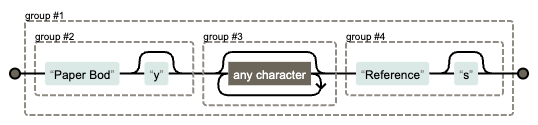

Then the paper body is processed for removing all the unwanted tags and spaces.

Let's examine the dictionary generated. For counting the total number of papers extracted. Using length function it is clear we have to process 200 paper that have been downloaded. The content dictionary stores tghe paper id as the key and the content as the value.

In [12]:
len(paper_content_dict)

200

In [13]:
paper_content_dict["PP3675"]

' Sparseness is being regarded as one of the key features in machine learning [15] and biology [16]. Sparse models are appealing since they provide an intuitive interpretation of a task at hand by singling out relevant pieces of information. Such automatic complexity reduction facilitates efficient training algorithms, and the resulting models are distinguished by small capacity. The interpretability is one of the main reasons for the popularity of sparse methods in complex domains such as computational biology, and consequently building sparse models from data has received a significant amount of recent attention. Unfortunately, sparse models do not always perform well in practice [7, 15]. This holds particularly for learning sparse linear combinations of data sources [15], an abstraction of which is known as multiple kernel learning (MKL) [10]. The data sources give rise to a set of (possibly correlated) P kernel matrices K1 , . . . , KM , and the task is to learn the optimal mixture

<div class="alert alert-block alert-warning">
    
### 4.1. Tokenization <a class="anchor" name="tokenize"></a>

Tokenization is a principal step in text processing and producing unigrams and bigrams. In this section, we start by tokenizing the sentences in ordere to achieve normalized sentences. As per required we are required to have the first letter of a word in a sentence to be in lowercase. punkt mdoule from nltk is used to achieve sentecne tokenization.


In [14]:
# unsupervised algorithm that helops to achieve sentence segmentation
nltk.download('punkt')
# dictionary to the segemented list for all the paper id as keys
sentence_seg = {}
# loops through the content dictionary
for key, value in paper_content_dict.items():
  # segements the entire paper body into different sentences 
  paper_segment = ""
  segment_list = []
  sentence = nltk.sent_tokenize(value)
  # sentence normaliation
  for i in sentence:
    segment = i.strip()
    paper_segment += segment[0].lower() + segment[1:]
  sentence_seg[key] = ''.join(paper_segment)
sentence_seg["PP3675"]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'sparseness is being regarded as one of the key features in machine learning [15] and biology [16].sparse models are appealing since they provide an intuitive interpretation of a task at hand by singling out relevant pieces of information.such automatic complexity reduction facilitates efficient training algorithms, and the resulting models are distinguished by small capacity.the interpretability is one of the main reasons for the popularity of sparse methods in complex domains such as computational biology, and consequently building sparse models from data has received a significant amount of recent attention.unfortunately, sparse models do not always perform well in practice [7, 15].this holds particularly for learning sparse linear combinations of data sources [15], an abstraction of which is known as multiple kernel learning (MKL) [10].the data sources give rise to a set of (possibly correlated) P kernel matrices K1 , ..., KM , and the task is to learn the optimal mixture K = m ?m 

Here we tokenize all the paper body contents to have a list of all the token in each paper. After the tokens are created we add them in a list and set it as a value in the dictionary having the paper id as the key.

In [15]:
# dictionary to store the tokens as the values and paper id as the key
token_dict = {}
# instansiates tokenizer accroding to the regex pattern passed
tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?")
# loops through the normalized content 
for key,value in sentence_seg.items():
  # tokenizes the paper body content for each individual paper
  tokens = tokenizer.tokenize(value)
  # stores the generated tokens
  token_dict[key] = tokens
token_dict["PP3675"]

['sparseness',
 'is',
 'being',
 'regarded',
 'as',
 'one',
 'of',
 'the',
 'key',
 'features',
 'in',
 'machine',
 'learning',
 'and',
 'biology',
 'sparse',
 'models',
 'are',
 'appealing',
 'since',
 'they',
 'provide',
 'an',
 'intuitive',
 'interpretation',
 'of',
 'task',
 'at',
 'hand',
 'by',
 'singling',
 'out',
 'relevant',
 'pieces',
 'of',
 'information',
 'such',
 'automatic',
 'complexity',
 'reduction',
 'facilitates',
 'efficient',
 'training',
 'algorithms',
 'and',
 'the',
 'resulting',
 'models',
 'are',
 'distinguished',
 'by',
 'small',
 'capacity',
 'the',
 'interpretability',
 'is',
 'one',
 'of',
 'the',
 'main',
 'reasons',
 'for',
 'the',
 'popularity',
 'of',
 'sparse',
 'methods',
 'in',
 'complex',
 'domains',
 'such',
 'as',
 'computational',
 'biology',
 'and',
 'consequently',
 'building',
 'sparse',
 'models',
 'from',
 'data',
 'has',
 'received',
 'significant',
 'amount',
 'of',
 'recent',
 'attention',
 'unfortunately',
 'sparse',
 'models',
 'do',


The above operation results in a dictionary with paper id as the key and all the paper content tokenized and stored as values.



In [16]:
# generates a list of all the tokens from the dictionary for all the papers
token_list = list(chain.from_iterable(token_dict.values()))
token_list[10]

'inference'

<div class="alert alert-block alert-warning">
    
### 4.2. Sparse Feature Generation <a class="anchor" name="whetev"></a>



Stopword/ stop tokens are those tokens which we don't need in our vocablary. These are extracted from the file provided in the sharedrive. We store these stopwords in a list.

In [17]:
# list to store all the stop words
stopwords_list = []
# opens the file containing the stop words
with open('/content/drive/Shareddrives/FIT5196_S1_2023/Assessment1/stopwords_en.txt') as f:
  # adds the stop words to the list
  stopwords_list = f.read().splitlines() 
stopwords_list[5]

'according'

<div class="alert alert-block alert-warning">
    
### 4.3. Finding First 200 Bigrams <a class="anchor" name="bigrams"></a>

One of the tasks is to find the first 200 bigrams based on frequency. These bigrams should also be included in our vocabulary list. We need to make sure that the bigrams are not in the stopwords. After we have our bigrams we check if they are present in the stopwaords list or not. If our bigrams are not part of stop word only then we add them to our vocabulary. Also we need to make sure we have only the 200 most frequent bigrams in our vocab.

In [18]:
# generates a list containing set of bigrams from the token list
bigram_list = list(nltk.bigrams(token_list))
# list to store the bigrams that are not included in the stop words list
fltrd_bgrms = []
for bigrams in bigram_list:
  # checks if the words in bigrams are contained in teh stop words
  if bigrams[0] not in stopwords_list and bigrams[1] not in stopwords_list:
    fltrd_bgrms.append(bigrams)
fltrd_bgrms[10]

('probability', 'distributions')

In [19]:
# creates a iter object of Counter type containing bigrams ad their frequencies of occurances
bgrms_frq = Counter(fltrd_bgrms)
# returns a list of most frequently occured 200 bigrams along with their frequencies
most_frq_bgrms = bgrms_frq.most_common(200)
top_200_bgrms = []
for values in most_frq_bgrms:
  top_200_bgrms.append(values[0])
top_200_bgrms[7]

('x1', 'x2')

We add the bigrams to our existing tokens list by concatenating the bigram with __ using MWETokenizer. We make our vocab list by converting the list of the updated tokens into a set which eleminated the duplicates and gives us unique tokens.

In [20]:
# creates a new tokenizer object with the bigrams concatenated with __
mwetokenizer = MWETokenizer(top_200_bgrms, separator = "__")
# creates a new dict object from the previos tokens and updates them with the new bigrams as tokens
colloc_dict =  dict((paper_id, mwetokenizer.tokenize(values)) for paper_id,values in token_dict.items())
# creates a list of all the updated tokens unigrams and top 200 bigrams
all_words_colloc = list(chain.from_iterable(colloc_dict.values()))
# creates a list of all unique tokens
colloc_voc = list(set(all_words_colloc))
colloc_voc[5]

'finalized'

At this stage, we have a dictionary of tokenized words, whose keys are indicative of file they are contained in.


In [21]:
# dictionary to store the tokens that are not in the stop words
stopped_token_dict = {}
# iterates through the updated dict containing bigrams
for keys, values in colloc_dict.items():
    stopped_tokens = []
    for tokens in values:
      if values not in stopwords_list:
        stopped_tokens.append(tokens)
    # adds the tokens which are not stop words to the dict
    stopped_token_dict[keys] = stopped_tokens
stopped_token_dict["PP3675"]

['sparseness',
 'is',
 'being',
 'regarded',
 'as',
 'one',
 'of',
 'the',
 'key',
 'features',
 'in',
 'machine__learning',
 'and',
 'biology',
 'sparse',
 'models',
 'are',
 'appealing',
 'since',
 'they',
 'provide',
 'an',
 'intuitive',
 'interpretation',
 'of',
 'task',
 'at',
 'hand',
 'by',
 'singling',
 'out',
 'relevant',
 'pieces',
 'of',
 'information',
 'such',
 'automatic',
 'complexity',
 'reduction',
 'facilitates',
 'efficient',
 'training',
 'algorithms',
 'and',
 'the',
 'resulting',
 'models',
 'are',
 'distinguished',
 'by',
 'small',
 'capacity',
 'the',
 'interpretability',
 'is',
 'one',
 'of',
 'the',
 'main',
 'reasons',
 'for',
 'the',
 'popularity',
 'of',
 'sparse',
 'methods',
 'in',
 'complex',
 'domains',
 'such',
 'as',
 'computational',
 'biology',
 'and',
 'consequently',
 'building',
 'sparse',
 'models',
 'from',
 'data',
 'has',
 'received',
 'significant',
 'amount',
 'of',
 'recent',
 'attention',
 'unfortunately',
 'sparse',
 'models',
 'do',
 'n

We eleminate the rare tokens. For this we need to make sure the frequency of occurance of each token should be less than 95% and more than 3% and token is of more than 3 characters.

In [22]:
# stores the tokens which are not rare
rare_token_dict = {}
rare_tokens = []
# list of all the tokens without stop words
tokens = list(chain.from_iterable([set(value) for value in stopped_token_dict.values()]))
# iterable object which stores the token as key and its frequency of occurance as value
token_frq = FreqDist(tokens).most_common(len(colloc_voc))
for tokens in token_frq:
  # if not rare tokens
  if len(tokens[0]) >= 3 and ((tokens[1]/len(stopped_token_dict)) <= 0.95) and ((tokens[1]/len(stopped_token_dict)) >= 0.03):
    rare_tokens.append(tokens[0])
for keys, values in stopped_token_dict.items():
  rare_val = []
  for tokens in values:
    if tokens in rare_tokens:  
      rare_val.append(tokens)
  # updated dict storing the tokens that are not rare
  rare_token_dict[keys] = rare_val
rare_token_dict["PP3675"]


['being',
 'regarded',
 'key',
 'features',
 'machine__learning',
 'biology',
 'sparse',
 'models',
 'appealing',
 'since',
 'they',
 'provide',
 'intuitive',
 'interpretation',
 'task',
 'hand',
 'out',
 'relevant',
 'pieces',
 'information',
 'automatic',
 'complexity',
 'reduction',
 'facilitates',
 'efficient',
 'training',
 'algorithms',
 'resulting',
 'models',
 'small',
 'capacity',
 'interpretability',
 'main',
 'reasons',
 'popularity',
 'sparse',
 'methods',
 'complex',
 'domains',
 'computational',
 'biology',
 'consequently',
 'building',
 'sparse',
 'models',
 'data',
 'received',
 'significant',
 'amount',
 'recent',
 'attention',
 'unfortunately',
 'sparse',
 'models',
 'always',
 'perform',
 'well',
 'practice',
 'holds',
 'particularly',
 'learning',
 'sparse',
 'linear',
 'combinations',
 'data',
 'sources',
 'abstraction',
 'known',
 'multiple',
 'kernel',
 'learning',
 'data',
 'sources',
 'give',
 'rise',
 'possibly',
 'correlated',
 'kernel',
 'matrices',
 'task',

Stemming is the process reducing a word to it stek value. Here we try to achieve that using the PorterStemmer class.

In [23]:
stemmed_dict = {}
# instantiates a class object
stemmer = PorterStemmer()
for keys in rare_token_dict.keys():
  st_token_list = []
  for value in rare_token_dict[keys]:
    if "__" in value: 
      # bigrans are not stemmed but used as is
      st_token_list.append(value)
    else:
      # stems any other tokens than bigrams
      st_token_list.append(stemmer.stem(value))
  stemmed_dict[keys] = st_token_list

In [24]:
len(stemmed_dict["PP3675"])

1870

<div class="alert alert-block alert-success">
    
## 5. Writing Output Files <a class="anchor" name="write"></a>

In [25]:
stemmed_list = list(chain.from_iterable(stemmed_dict.values()))

files need to be generated:
* Vocabulary list
* Sparse matrix (count_vectors)
* Statistics matrix

This is performed in the following sections.

<div class="alert alert-block alert-warning">
    
### 5.1. Vocabulary List <a class="anchor" name="write-vocab"></a>

List of vocabulary should also be written to a file, sorted alphabetically, with their reference codes in front of them. This file also refers to the sparse matrix in the next file. For this purpose.

In [26]:
# list of tokens sorted alphabetically
vocab_list = sorted(set(stemmed_list))
vocab_dict = {}

for i in range(len(vocab_list)):
  # getting the index position of the token
  vocab_dict[vocab_list[i]] = i

os.chdir("/content/drive/MyDrive/Asessment1/OutputFiles/Task2")
# creates a file containing the token and its index position
with open('task2_31940757_vocab.txt','w') as vocab:
  for key, value in vocab_dict.items():
    vocab.write(key+":"+str(value)+"\n")

In [27]:
vocab_list

['EM__algorithm',
 'Experiments__We',
 'Figure__The',
 'Gaussian__distribution',
 'Gaussian__noise',
 'Gibbs__sampling',
 'KL__divergence',
 'Markov__chain',
 'Monte__Carlo',
 'Neural__Information',
 'Processing__Systems',
 'ROC__curve',
 'Related__Work',
 'abil',
 'abl',
 'about',
 'abov',
 'absenc',
 'absolut',
 'abstract',
 'abus',
 'acceler',
 'accept',
 'access',
 'accommod',
 'accord',
 'accordingli',
 'account',
 'accumul',
 'accur',
 'accuraci',
 'achiev',
 'acknowledg',
 'acquir',
 'across',
 'act',
 'action',
 'activ',
 'active__learning',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addit',
 'address',
 'adequ',
 'adjac',
 'adjoint',
 'adjust',
 'admit',
 'adopt',
 'advanc',
 'advantag',
 'adversari',
 'affect',
 'affin',
 'aforement',
 'after',
 'again',
 'against',
 'age',
 'agent',
 'agent?',
 'aggreg',
 'agnost',
 'agre',
 'agreement',
 'ahead',
 'aid',
 'aij',
 'aim',
 'akin',
 'albeit',
 'alg',
 'algebra',
 'algo',
 'algorithm',
 'algorithm?',
 'align',
 'all',
 'all

<div class="alert alert-block alert-warning">
    
### 5.2. Sparse Matrix <a class="anchor" name="write-sparseMat"></a>

For writing sparse matrix for a paper, we firstly calculate the frequency of words for that paper. We achieve this by converting the text to numerical data using CountVectorizer. This is used to convert the text data to a matrix containing count of the tokens.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
# creates a CountVectorizer object
vectorizer = CountVectorizer(analyzer = "word") 
# creates the sparse matrix        
sparse_matrix = vectorizer.fit_transform([' '.join(value) for value in stemmed_dict.values()])
print (sparse_matrix.toarray())   

[[0 1 1 ... 0 2 0]
 [0 0 0 ... 0 0 0]
 [0 0 8 ... 0 1 0]
 ...
 [2 2 2 ... 0 9 0]
 [1 2 3 ... 0 2 0]
 [0 1 2 ... 0 1 0]]


<div class="alert alert-block alert-warning">
    
### 5.3. Statistics Matrix <a class="anchor" name="write-sparseMat"></a>

In [29]:
# create a file for storing the vector count
vector_file = open("./task2_31940757_count_vectors.txt", 'w')
# creates a dict for storing numerical tokens
sparse_dict = {}
# instantiates index 
idx = 0

for token in vocab_list:
  # replace the token value with its index value
  sparse_dict[token] = idx
  idx = idx + 1
    
# iterates through updated dict    
for key, value in stemmed_dict.items():
  # token id list
  value_id = [sparse_dict[token] for token in value]
  vec_str = ""
  vector_file.write("{paper_id},".format(paper_id = key))
  for m, n in FreqDist(value_id).items():
    vec_str += "{token_index}:{word_count},".format(token_index = m, word_count = n)
  vector_file.write(vec_str[:-2])
  vector_file.write('\n')
vector_file.close()

For writing overall statistics of papers, we aggregate statistics

In [30]:
auth_dict = {}
title_dict = {}
abstract_dict = {}
for keys in file_dict.keys():
  # matches for author data
  auth_matches = re.search(r'(?:Authored by:)(.*)(?:Abstract\n)',file_dict[keys], re.DOTALL)
  if auth_matches:
    # authors names in captured groups
    authors = auth_matches.group(1)
    authors = re.sub('-\n','',authors)
    authors = re.sub('\n',',',authors)
    auth_dict[keys] = authors
  # matches for title data
  title_matches = re.search(r'(.*)(?:Authored by:)',file_dict[keys], re.DOTALL)
  if title_matches:
    title = title_matches.group(1)
    title = re.sub('-\n','',title)
    title = re.sub('\n',' ',title)
    title_dict[keys] = title
  # matches for abstract data
  abstract_matches = re.search(r'(?:Abstract\n)(.*)(?:\d*Paper Body)',file_dict[keys], re.DOTALL)
  if abstract_matches:
    abstract = abstract_matches.group(1)
    abstract = re.sub('-\n','',abstract)
    abstract = re.sub('\n',' ',abstract)
    abstract_dict[keys] = abstract

In [31]:
title_token = {} 
# create titke tokens
tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?")
for keys, values in title_dict.items():
    tokens = tokenizer.tokenize(values.lower())
    title_token[keys] = tokens

In [32]:
title_token

{'PP3164': ['efficient',
  'principled',
  'learning',
  'of',
  'thin',
  'junction',
  'trees'],
 'PP3219': ['active',
  'preference',
  'learning',
  'with',
  'discrete',
  'choice',
  'data'],
 'PP3220': ['receptive', 'fields', 'without', 'spike-triggering'],
 'PP3249': ['computational',
  'equivalence',
  'of',
  'fixed',
  'points',
  'and',
  'no',
  'regret',
  'algorithms',
  'and',
  'convergence',
  'to',
  'equilibria'],
 'PP3250': ['theoretical',
  'analysis',
  'of',
  'heuristic',
  'search',
  'methods',
  'for',
  'online',
  'pomdps'],
 'PP3279': ['modeling',
  'image',
  'patches',
  'with',
  'directed',
  'hierarchy',
  'of',
  'markov',
  'random',
  'fields'],
 'PP3296': ['variational', 'inference', 'for', 'markov', 'jump', 'processes'],
 'PP3305': ['general',
  'boosting',
  'method',
  'and',
  'its',
  'application',
  'to',
  'learning',
  'ranking',
  'functions',
  'for',
  'web',
  'search'],
 'PP3309': ['the', 'infinite', 'gamma-poisson', 'feature', 'mod

In [33]:
# removing stop words
title_tok_list = list(chain.from_iterable(title_token.values()))
stop_title = {}
for keys, values in title_token.items():
  stopped_tokens = []
  for tokens in values:
    if tokens not in stopwords_list:
      stopped_tokens.append(tokens)
  stop_title[keys] = stopped_tokens

In [34]:
# updated title token list
title_tok_list = list(chain.from_iterable(stop_title.values()))
# creates iter object with frequency distribution of tokens
title_freq = FreqDist(title_tok_list).most_common(10)[:10]
# sorts data in descending order of frequency and alphabetically
sorted_title = sorted(sorted(title_freq, key = lambda x: x[0]), key = lambda x: x[1], reverse = True)
# creates list of the top 10 tokens
top_title = list([value[0] for value in sorted_title])

In [35]:
title_freq

[('learning', 46),
 ('models', 18),
 ('neural', 13),
 ('inference', 12),
 ('optimization', 12),
 ('data', 11),
 ('model', 11),
 ('networks', 10),
 ('estimation', 10),
 ('analysis', 9)]

In [36]:
abstract_seg = {}
# loops through the content dictionary
for key, value in abstract_dict.items():
  abstract_sentence = []
  # segements the entire paper body into different sentences 
  sentence = nltk.sent_tokenize(value)
  # sentence normaliation
  for i in range(0, len(sentence)):
    segment = sentence[i].strip()
    norm_list = segment.split(' ')
    norm_list[0] = norm_list[0].lower()
    norm_sentence = ' '.join(norm_list)
    # first word of each sentence is changed to lower case
    #sentence[i] = sentence[i][0].lower() + sentence[i][1:]
    # stores the normalized sentence
    abstract_sentence.append(norm_sentence)
  abstract_seg[key] = ''.join(abstract_sentence)

In [37]:
abstract_token = {} 
tokenizer = RegexpTokenizer(r"[A-Za-z]\w+(?:[-'?]\w+)?")
for keys, values in abstract_dict.items():
    tokens = tokenizer.tokenize(values.lower())
    abstract_token[keys] = tokens

In [38]:
abstract_tok_list = list(chain.from_iterable(abstract_token.values()))
stop_abstract = {}
for keys, values in abstract_token.items():
  stopped_tokens = []
  for tokens in values:
    if tokens not in stopwords_list:
      stopped_tokens.append(tokens)
  stop_abstract[keys] = stopped_tokens

In [39]:
abstract_tok_list = list(chain.from_iterable(stop_abstract.values()))
abstract_freq = FreqDist(abstract_tok_list).most_common(10)[:10]
sorted_abstract = sorted(sorted(abstract_freq, key = lambda x: x[0]), key = lambda x: x[1], reverse = True)
top_abstract = list([value[0] for value in sorted_abstract])

In [40]:
top_abstract

['model',
 'learning',
 'algorithm',
 'data',
 'problem',
 'show',
 'algorithms',
 'models',
 'paper',
 'methods']

In [41]:
authors = []
# separates the full name of all the authors in the data
for key in auth_dict.keys():
  auth_list = auth_dict[key].split(",")
  for i in auth_list:
    if i != '':
       authors.append(i)
authors[5]

'Matthias Bethge'

In [42]:
auth_freq = FreqDist(authors).most_common(10)[:10]
sorted_authors = sorted(sorted(auth_freq, key = lambda x: x[0]), key = lambda x: x[1], reverse = True)
top_authors = list([value[0] for value in sorted_authors])

In [43]:
#create df for the stats
stats_df = pd.DataFrame({"top10_terms_in_abstracts" : top_abstract,
                        "top10_terms_in_titles" : top_title,
                        "top10_authors" : top_authors})
stats_df

,top10_terms_in_abstracts,top10_terms_in_titles,top10_authors
0,model,learning,Francis Bach
1,learning,models,Geoffrey E. Hinton
2,algorithm,neural,Lawrence Carin
3,data,inference,Percy S. Liang
4,problem,optimization,Richard Zemel
5,show,data,Carlos Guestrin
6,algorithms,model,Jakob H. Macke
7,models,estimation,Manfred Opper
8,paper,networks,Matthias Bethge
9,methods,analysis,Tao Qin


In [44]:
stats_df.to_csv('/content/drive/MyDrive/Asessment1/OutputFiles/Task2/task2_31940757_stats.csv')

-------------------------------------

<div class="alert alert-block alert-success">
    
## 6. References <a class="anchor" name="Ref"></a>

[1] https://cheatography.com/davechild/cheat-sheets/regular-expressions/

[2] https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

[3] https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c#:~:text=Countvectorizer%20is%20a%20method%20to,sparse%20matrix%20as%20shown%20below.

[4] https://stackoverflow.com/questions/4233476/sort-a-list-by-multiple-attributes



## --------------------------------------------------------------------------------------------------------------------------